In [1]:
import pandas as pd

from datetime import datetime

import spotipy
from credentials import client_id, client_secret
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

scope = 'user-library-read'
username = 'Christian Tirol'

user = '125065858'

df = pd.read_csv('spotify_track_with_artist_info.csv')

In [2]:
df['artist_genres'] = pd.Series()

In [4]:
start = datetime.now()
counter = 0

for artist_id in df['artist_id'].unique():
    counter += 1
    if any(df.loc[df['artist_id'] == artist_id].artist_genres.isnull()):
        artist_info = sp.artist(artist_id)
        df.loc[df['artist_id'] == artist_id,'artist_popularity'] = artist_info['popularity']
        df.loc[df['artist_id'] == artist_id,'artist_followers'] = artist_info['followers']['total']
        df.loc[df['artist_id'] == artist_id,'artist_genres'] = ', '.join(artist_info['genres'])

        sec_elapsed = (datetime.now() - start).total_seconds()
        aps = counter / sec_elapsed
        artists_left = len(df.artist_id.unique()) - counter
        sec_left = artists_left / aps
        total_count = len(df.artist_id.unique())
    print('\r',sec_elapsed,'seconds elapsed |',aps,'aps |',sec_left,'seconds remaining |',artists_left,'of',total_count,'remaining',end='')

 58.304196 seconds elapsed | 8.095472236680873 aps | 0.0 seconds remaining | 0 of 472 remaining

In [5]:
df.to_csv('spotify_track_with_genres.csv',index=False)

---

In [5]:
df = pd.read_csv('spotify_track_with_genres.csv')

In [6]:
df.head()

,playlist_id,playlist_name,playlist_uri,track_id,track_name,track_popularity,track_uri,added_on,danceability,energy,...,track_artist,artist_id,featured_artists,time_added,date_added,hour_added,day_added,artist_genres,artist_popularity,artist_followers
0,4dzfNpjHWfTk48NkahGHX5,Pierce,spotify:user:125065858:playlist:4dzfNpjHWfTk48...,6cd3jB1kIDowUwsApyXrd1,That's O.K.,44,spotify:track:6cd3jB1kIDowUwsApyXrd1,2019-02-19T16:03:28Z,0.497,0.611,...,Jonwayne,3i7IUsb5VsiJAKqX2Md9Fc,NaN,16:03:28,2019-02-19,16,2,"alternative hip hop, escape room, wonky",48.0,60367.0
1,4dzfNpjHWfTk48NkahGHX5,Pierce,spotify:user:125065858:playlist:4dzfNpjHWfTk48...,6PInkrdWpzFi6c4Ffrzs3q,Baybee,57,spotify:track:6PInkrdWpzFi6c4Ffrzs3q,2019-02-19T19:47:20Z,0.624,0.599,...,Jay Som,1wmiQ6ytATiGnJs6uFluKO,NaN,19:47:20,2019-02-19,19,2,"art pop, bay area indie, chamber pop, chillwav...",53.0,41611.0
2,4dzfNpjHWfTk48NkahGHX5,Pierce,spotify:user:125065858:playlist:4dzfNpjHWfTk48...,7G8xNxQAWiBPAVgBqEVI7o,I Came Running,52,spotify:track:7G8xNxQAWiBPAVgBqEVI7o,2019-02-20T17:24:42Z,0.655,0.779,...,Ancient Astronauts,09JW90QIws2Z3H8hxL5fFN,NaN,17:24:42,2019-02-20,17,3,"acid jazz, ninja, nu jazz, trip hop, turntablism",44.0,20337.0
3,4dzfNpjHWfTk48NkahGHX5,Pierce,spotify:user:125065858:playlist:4dzfNpjHWfTk48...,5GKekzF1YcR2DQd9c3DI8y,Cigarettes out the Window,58,spotify:track:5GKekzF1YcR2DQd9c3DI8y,2019-02-20T17:37:59Z,0.626,0.659,...,TV Girl,0Y6dVaC9DZtPNH4591M42W,NaN,17:37:59,2019-02-20,17,3,"chillwave, indie garage rock, indie pop, indie...",57.0,63060.0
4,4dzfNpjHWfTk48NkahGHX5,Pierce,spotify:user:125065858:playlist:4dzfNpjHWfTk48...,6Q2wQud0dEXtM9CenNKmLc,Curious,33,spotify:track:6Q2wQud0dEXtM9CenNKmLc,2019-02-20T23:28:38Z,0.485,0.691,...,Jonwayne,3i7IUsb5VsiJAKqX2Md9Fc,"Jeremiah Jae, Zeroh",23:28:38,2019-02-20,23,3,"alternative hip hop, escape room, wonky",48.0,60367.0


When do I like to listen indie artists the most?

--- 

In [10]:
%matplotlib inline

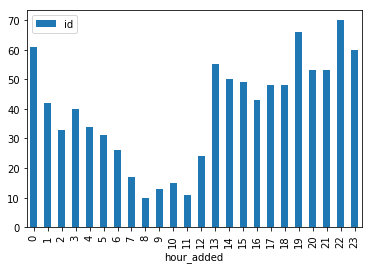

In [14]:
df[['hour_added','id']].groupby('hour_added').count().plot(kind='bar')

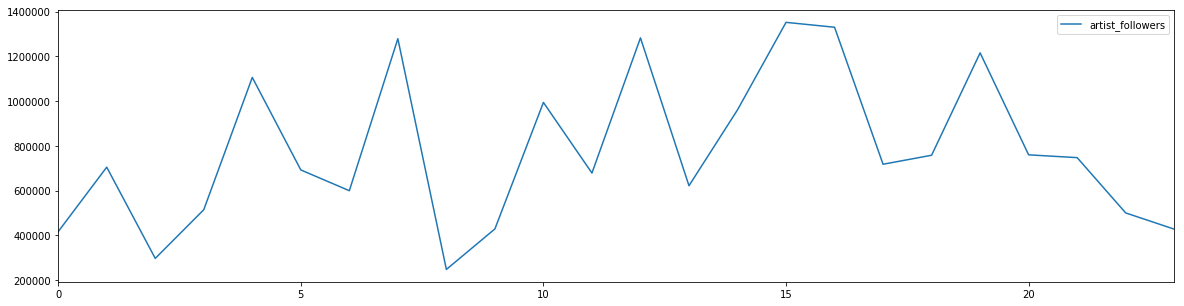

In [39]:
df[['hour_added','artist_followers']].groupby('hour_added').mean().reset_index().plot(
    kind='line',
    y='artist_followers',
    figsize=(20,5))

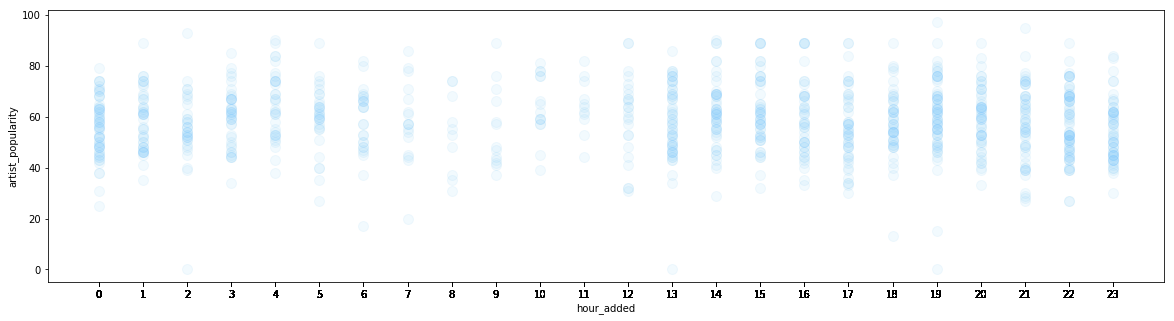

In [42]:
y = 'artist_popularity'
x = 'hour_added'
df[[x,y]].plot(
    kind='scatter',
    y=y,
    x=x,
    figsize=(20,5),
    alpha=.10,
    c='lightskyblue',
    s=100,
    xticks=df[x]
)

# Genre Analysis
---

In [45]:
df.columns

Index(['playlist_id', 'playlist_name', 'playlist_uri', 'track_id',
       'track_name', 'track_popularity', 'track_uri', 'added_on',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'track_artist', 'artist_id', 'featured_artists',
       'time_added', 'date_added', 'hour_added', 'day_added', 'artist_genres',
       'artist_popularity', 'artist_followers'],
      dtype='object')

In [55]:
[i.split(', ') for i in df.artist_genres]

AttributeError: 'float' object has no attribute 'split'

In [67]:
df[df.artist_genres.isnull()].head()

,playlist_id,playlist_name,playlist_uri,track_id,track_name,track_popularity,track_uri,added_on,danceability,energy,...,track_artist,artist_id,featured_artists,time_added,date_added,hour_added,day_added,artist_genres,artist_popularity,artist_followers
60,6Pqno6KO7pgS6NZg1MkhV8,Capricious,spotify:user:125065858:playlist:6Pqno6KO7pgS6N...,1nHSd8kdi9L97TUee9MyfP,In the Midst,48,spotify:track:1nHSd8kdi9L97TUee9MyfP,2018-12-21T23:15:54Z,0.585,0.592,...,sir Was,2pRRvc1D9seqK4txoe8laT,NaN,23:15:54,2018-12-21,23,5,NaN,38.0,8368.0
93,7fiCA5gPq6WzaT4Mz4AOgF,Sanguine,spotify:user:125065858:playlist:7fiCA5gPq6WzaT...,5KFEIAteNnIfsHNQCsCWBV,Thank You,0,spotify:track:5KFEIAteNnIfsHNQCsCWBV,2018-11-22T19:32:06Z,0.657,0.647,...,Chartruce Owens,2iQ4XQnSom52IZs433Q1nd,NaN,19:32:06,2018-11-22,19,4,NaN,0.0,21.0
94,7fiCA5gPq6WzaT4Mz4AOgF,Sanguine,spotify:user:125065858:playlist:7fiCA5gPq6WzaT...,4TZhdnDbfV0aAxFV8CGkEJ,Run Away,28,spotify:track:4TZhdnDbfV0aAxFV8CGkEJ,2018-11-28T19:54:53Z,0.448,0.923,...,DJ Soak,4oM2n6f6zR1hS04DNFQssK,NaN,19:54:53,2018-11-28,19,3,NaN,15.0,204.0
96,7fiCA5gPq6WzaT4Mz4AOgF,Sanguine,spotify:user:125065858:playlist:7fiCA5gPq6WzaT...,1R1LDGWdnbzVxiAuOadBJ2,Rage Values,0,spotify:track:1R1LDGWdnbzVxiAuOadBJ2,2018-11-29T02:54:30Z,0.531,0.975,...,Feature Cuts,5XUO8eddXTz4AYUQGvgOeA,NaN,02:54:30,2018-11-29,2,4,NaN,0.0,236.0
101,7fiCA5gPq6WzaT4Mz4AOgF,Sanguine,spotify:user:125065858:playlist:7fiCA5gPq6WzaT...,6DrqpyQcIFLG6PM4uJ8wzp,'98 gewehr,35,spotify:track:6DrqpyQcIFLG6PM4uJ8wzp,2018-12-01T00:51:55Z,0.867,0.352,...,Nostrum Grocers,2JHVYm50g7XEH4NyH0oKEI,"Milo, Elucid",00:51:55,2018-12-01,0,6,NaN,31.0,1789.0


In [68]:
# aw laaame, not all artists have genre info...

In [69]:
df.fillna('',inplace=True)

In [73]:
df.head()

,playlist_id,playlist_name,playlist_uri,track_id,track_name,track_popularity,track_uri,added_on,danceability,energy,...,track_artist,artist_id,featured_artists,time_added,date_added,hour_added,day_added,artist_genres,artist_popularity,artist_followers
0,4dzfNpjHWfTk48NkahGHX5,Pierce,spotify:user:125065858:playlist:4dzfNpjHWfTk48...,6cd3jB1kIDowUwsApyXrd1,That's O.K.,44,spotify:track:6cd3jB1kIDowUwsApyXrd1,2019-02-19T16:03:28Z,0.497,0.611,...,Jonwayne,3i7IUsb5VsiJAKqX2Md9Fc,,16:03:28,2019-02-19,16,2,"alternative hip hop, escape room, wonky",48.0,60367.0
1,4dzfNpjHWfTk48NkahGHX5,Pierce,spotify:user:125065858:playlist:4dzfNpjHWfTk48...,6PInkrdWpzFi6c4Ffrzs3q,Baybee,57,spotify:track:6PInkrdWpzFi6c4Ffrzs3q,2019-02-19T19:47:20Z,0.624,0.599,...,Jay Som,1wmiQ6ytATiGnJs6uFluKO,,19:47:20,2019-02-19,19,2,"art pop, bay area indie, chamber pop, chillwav...",53.0,41611.0
2,4dzfNpjHWfTk48NkahGHX5,Pierce,spotify:user:125065858:playlist:4dzfNpjHWfTk48...,7G8xNxQAWiBPAVgBqEVI7o,I Came Running,52,spotify:track:7G8xNxQAWiBPAVgBqEVI7o,2019-02-20T17:24:42Z,0.655,0.779,...,Ancient Astronauts,09JW90QIws2Z3H8hxL5fFN,,17:24:42,2019-02-20,17,3,"acid jazz, ninja, nu jazz, trip hop, turntablism",44.0,20337.0
3,4dzfNpjHWfTk48NkahGHX5,Pierce,spotify:user:125065858:playlist:4dzfNpjHWfTk48...,5GKekzF1YcR2DQd9c3DI8y,Cigarettes out the Window,58,spotify:track:5GKekzF1YcR2DQd9c3DI8y,2019-02-20T17:37:59Z,0.626,0.659,...,TV Girl,0Y6dVaC9DZtPNH4591M42W,,17:37:59,2019-02-20,17,3,"chillwave, indie garage rock, indie pop, indie...",57.0,63060.0
4,4dzfNpjHWfTk48NkahGHX5,Pierce,spotify:user:125065858:playlist:4dzfNpjHWfTk48...,6Q2wQud0dEXtM9CenNKmLc,Curious,33,spotify:track:6Q2wQud0dEXtM9CenNKmLc,2019-02-20T23:28:38Z,0.485,0.691,...,Jonwayne,3i7IUsb5VsiJAKqX2Md9Fc,"Jeremiah Jae, Zeroh",23:28:38,2019-02-20,23,3,"alternative hip hop, escape room, wonky",48.0,60367.0
